# Introduction to Neuroinformatics

# Exercise session 8: Dynamical systems

In this exercise session, you will get your introduction dynamical systems theories of the brain. To begin with, we will give you an introduction to general dynamical systems before moving to theories about dynamical systems in the brain next week.

---

# Table of contents
* [Packages](#packages)
* [1: 1-Dimensional linear systems refresher](#1d)
* [2: 2-Dimensional linear dynamical systems and flowfields](#2d)
* [3: Modes of linear systems](#modes)
* [4: Noise and fitting dynamics](#noise)
* [5: High-dimensional dynamical systems and manifolds](#hd)
* [6: Nonlinear dynamics and linearization](#nl)
  * [6.1: Fixed points and slow points](#fp)
  * [6.2: Local linearlization](#local)



---

# Packages <a name="packages"></a>

The following cells are used to install the necessary packages and libraries for the exercise.

In [1]:
!which python  # This displays which python is being used
!pwd # This displays the current directory

/usr/local/bin/python
/content


In [2]:
!mkdir utils_ex8
!wget -P utils_ex8/ https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex8/dynamical_systems_utils.py

import numpy as np
import matplotlib.pyplot as plt

from utils_ex8.dynamical_systems_utils import *
from utils_ex8.dynamical_systems_utils import continuous_update
from ipywidgets import interact, FloatSlider

from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

--2026-01-14 17:17:16--  https://github.com/ManteLab/Iton_notebooks_public/raw/refs/heads/main/utils_ex8/dynamical_systems_utils.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ManteLab/Iton_notebooks_public/refs/heads/main/utils_ex8/dynamical_systems_utils.py [following]
--2026-01-14 17:17:17--  https://raw.githubusercontent.com/ManteLab/Iton_notebooks_public/refs/heads/main/utils_ex8/dynamical_systems_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6909 (6.7K) [text/plain]
Saving to: ‘utils_ex8/dynamical_systems_utils.py’

dynamical_systems_u 100%[===================>]   6.75K  --.

---

# 1.  1-Dimensional linear systems refresher <a name="1d"></a>

You might remember 1- and 2-dimensional dynamical systems from high school or introductory university classes. These systems are governed by an ordinary differential equation (ODE) in the form: $\dot{x} = f(x)$ or $\frac{dx}{dt} = f(x)$, where $t$ is time. Note that ODEs only describe <b>change</b>, so every ODE also needs a starting point. The starting point is denoted $x(0)$. Next, we will simulate 2 ODEs.

1. $\dot{x} = 1.5x$, $x(0) = 1$
2. $\dot{x} = -1.5x$, $x(0) = 1$


<b> A note on simulating ODEs: </b>

ODEs are <b>continuous</b> time systems, meaning that they can be evaluated for arbitrarily small windows of time. To do that, we will have to use a so-called "solver". Here, we will use [Euler's method.](https://en.wikipedia.org/wiki/Euler_method) We will not go into ODE solvers in detail.




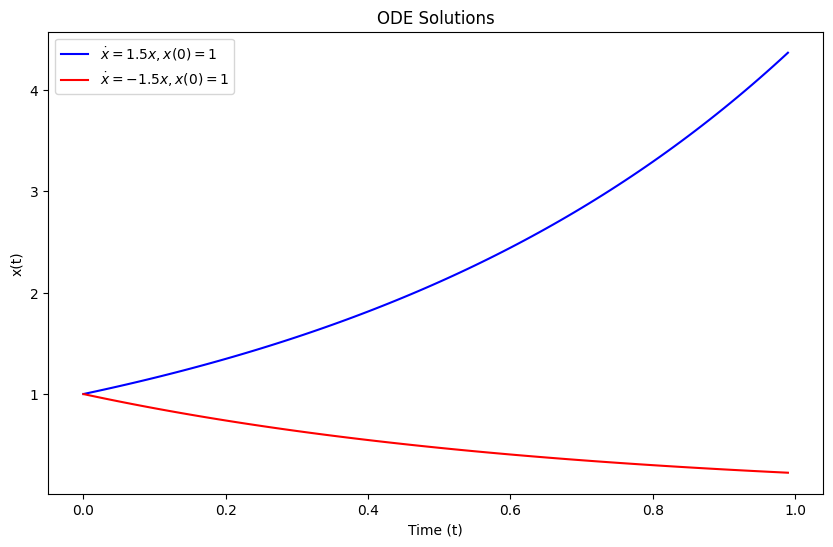

In [3]:
# Time parameters
t0 = 0  # start time
tf = 1  # end time
dt = 0.01  # time step
t = np.arange(t0, tf, dt)  # time array

# Initialize arrays to store the solutions
x1 = np.zeros_like(t)
x2 = np.zeros_like(t)

# Initial conditions
x1[0] = 1 # for ODE 1
x2[0] = 1 # for ODE 2

# Euler's method for the first ODE: dx/dt = 1.5x
for i in range(1, len(t)):
    x1[i] = x1[i-1] + dt * (1.5 * x1[i-1])

    # Euler's method for the second ODE: dx/dt = -1.5x
    x2[i] = x2[i-1] + dt * (-1.5 * x2[i-1])


# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(t, x1, label=r'$\dot{x} = 1.5x, x(0) = 1$', color='b')
plt.plot(t, x2, label=r'$\dot{x} = -1.5x, x(0) = 1$', color='r')

plt.title('ODE Solutions')
plt.xlabel('Time (t)')
plt.ylabel('x(t)')
plt.legend()
plt.show()

---

> **Assignment 1**
>
> One of these systems is called "unstable", the other "attracting". Can you tell which is which? (yes/no, why?)
> <details>
> <summary>Solution</summary>
>
>The first system is unstable, it only grows <b>unless</b> it starts at zero, meaning that it's stable at zero, but any small changes will cause it to explode into infinity or minus infinity.  The second attracts. It will allways end at the same point. You cannot tell this based on the plot above alone, you would either have to analyze the equation or run many simulations
> </details>



---

> **Assignment 2**
> One other common pattern in dynamical systems is an "expanding" system. Can you come up with an equation that only ever grows?
> <details>
> <summary>Solutions</summary>
>
> One example is: $\dot{x} = 1 + x^2$. This is always positive, so will always grow.
> </details>  

---

As you might have noticed, it's difficult to look at a single trajectory (the lines above) from an ODE, and determine the behaviour (attracting, unstable, etc..). But this becomes more clear when starting the ODE at different locations.

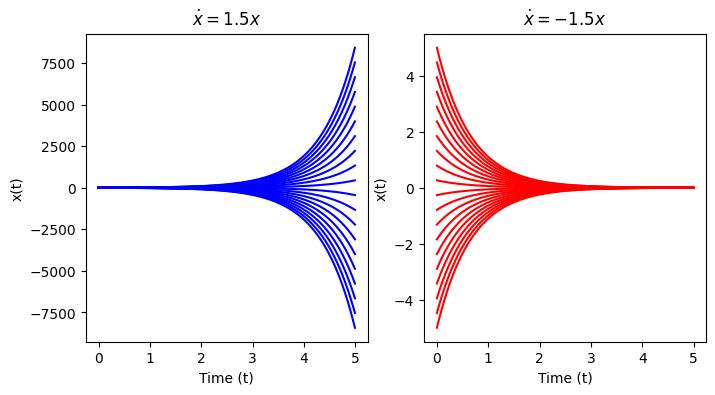

In [4]:
# Time parameters
t0 = 0  # start time
tf = 5  # end time
dt = 0.01  # time step
t = np.arange(t0, tf, dt)  # time array

# Initialize arrays to store the solutions

x2 = np.zeros_like(t)

# Initial conditions
x1[0] = 1 # for ODE 1x1 = np.zeros_like(t)
x2[0] = 1 # for ODE 2



# Plot the results
f, axes = plt.subplots(1, 2, figsize=(8, 4))



starts = np.linspace(-5, 5, 20)
# Euler's method for the first ODE: dx/dt = 1.5x
for s in starts:
    x1 = np.zeros_like(t)
    x1[0] = s # for ODE 1

    x2 = np.zeros_like(t)
    x2[0] = s # for ODE 1
    for i in range(1, len(t)):
        x1[i] = x1[i-1] + dt * (1.5 * x1[i-1])
        x2[i] = x2[i-1] + dt * (-1.5 * x2[i-1])



    axes[0].plot(t, x1, color='b')
    axes[1].plot(t, x2, color='r')


axes[0].set_title(r'$\dot{x} = 1.5x$')
axes[1].set_title(r'$\dot{x} = -1.5x$')
axes[0].set_xlabel('Time (t)')
axes[1].set_xlabel('Time (t)')

axes[0].set_ylabel('x(t)')
axes[1].set_ylabel('x(t)')
plt.show()

Note that so far we have only looked at linear systems, but in $\dot{x} = f(x)$, $f$ does not have to be linear, and can be extremely complex. In real-life applications typically $f$ is actually often highly non-linear. So as we will see later, these functions can have extremely complicated behaviour.

---

# 2.  2-Dimensional linear dynamical systems and flowfields <a name="2d"></a>

It's relatively straightforward to extend an ODE to 2 dimensions. One example would be the system that has both $x$ and $y$ variables:

$\begin{pmatrix}
  \dot{x} \newline
  \dot{y} \\
         \end{pmatrix} = A \begin{pmatrix}
            x \newline
            y \\
         \end{pmatrix}$

In this system, the $A$ matrix determines the change of both $x$ and $y$, and is therefore called the <b>dynamics matrix</b>. Next, we'll create a 2-dimensional system with our own dynamics matrix. We are giving you two initial conditions and a dynamics matrix. The initial conditions we are giving you are very similar. Try to add some initial conditions to figure out what sort of system we are dealing with (attracting, expanding or unstable).

Try a number of different initial conditions.

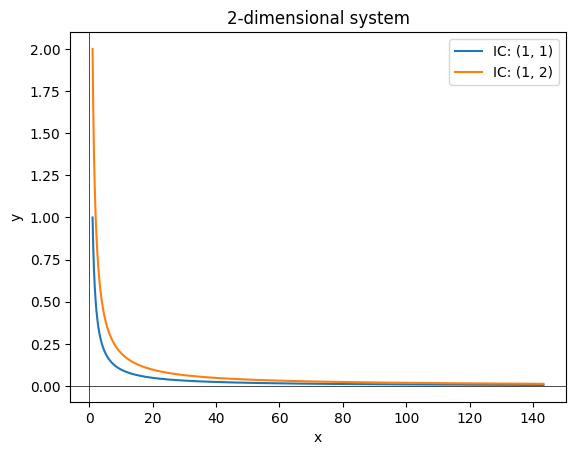

In [5]:
# Initial conditions (you can try different initial conditions here)
# Initial conditions are structured: (x coordinate, y coordinate)
initial_conditions = [(1, 1), (1, 2)]


# Define the system matrix A
A = np.array([[1, 0],
              [0, -1]])

# Solve the system for each set of initial conditions
for z0 in initial_conditions:
    z = np.zeros((len(t), 2))  # z stores both x and y
    z[0] = z0  # Initial condition for (x, y)

    # Euler's method using matrix multiplication
    for i in range(1, len(t)):
        z[i] = z[i-1] + dt * (A @ z[i-1])  # Matrix multiplication (A @ z)



    # Plot the trajectory in the phase space (x, y)
    plt.plot(z[:, 0], z[:, 1], label=f'IC: {z0}')

# Phase plot settings
plt.title('2-dimensional system')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

---

> **Assignment 3**
>
> What sort of system are we dealing with (expanding, stable, unstable, contracting)?
> <details>
>
> <summary>Solutions</summary>
>
> This system is unstable. The point (0, 0) is stable, but any small changes will lead trajectories to infinity. This is relatively easy to check by starting the system at (0, 0) and on all four sides of the origin: ((-1, 1), (1, -1), (1, 1), (-1, -1))
> </details>

---

Once again, you will notice that the structure of dynamics only becomes clear once we plot many different trajectories from many different initial conditions. Instead of going through this manually, we often visualize a system by drawing it's <b>flowfield</b> (sometimes: phase space). A flowfield does not draw individual trajectories, but shows the "flow" at specific locations in space by drawing arrows. These arrows represent two things:

1. The direction of change $\dot{x}$ is shown using the direction of arrows
2. The speed of change $\dot{x}$ is shown using the length of the arrows (shorter arrow = smaller changes)




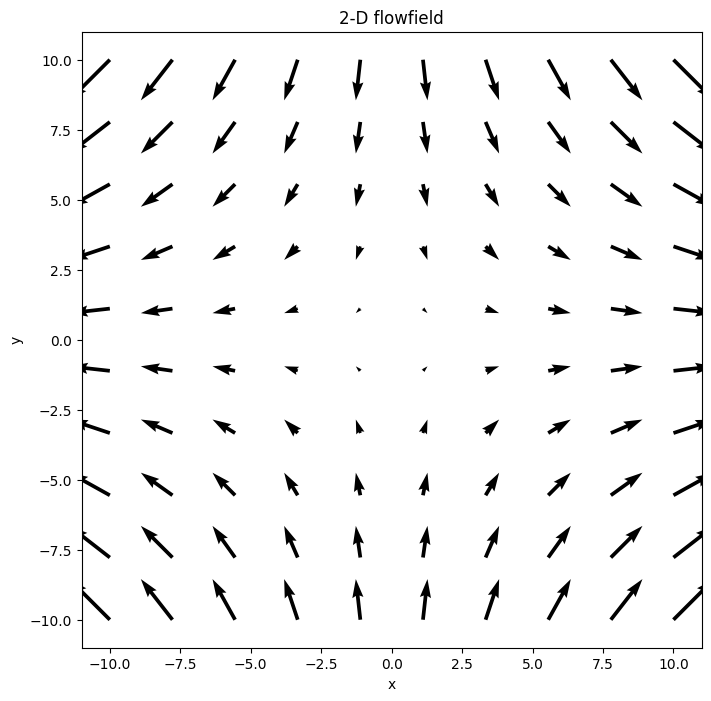

In [6]:
# Define the system matrix A
A = np.array([[1, 0],
              [0, -1]])

# Define the system of ODEs
def linear_system(X, t=0):
    return A @ X

_=plot_2d_flowfield(linear_system, title='2-D flowfield')

---

> **Assignment 4**
>
> Have a look at the flowfield below. It seems clear that arrows become larger towards the edges of the plot, suggesting growth to infinity. However, what suggests that this system actually has a stable point (a point that the system never leaves)
>
> <details>
> <summary>Solutions</summary>
>
> The fact that there are no arrows in the center suggests that there is no movement at (0,0) and that therefore this point is stable.
> </details>
---


# Modes of linear systems <a name="modes"></a>

In the previous question we asked how you would be able to tell if the system is unstable just by looking at the flowfield. However, this is not a very exact approach. If we have a very complicated system, the dynamics might just be extremely slow, resulting in tiny arrows in the flowfield. To get an exact answer to what type of system we're studying, we find a system's <b>eigenmodes</b>. These eigenmodes can give exact insights into the type of system we're analyzing. In linear systems that have the form $\dot{x} = Ax + b$, these modes can be extracted by performing an <b>eigendecomposition</b> on the dynamics matrix $A$: $A = Q\Lambda Q^{-1}$, where $Q$ is a matrix of the eigenvectors of $A$, and $\Lambda$ a diagonal matrix that contains the corresponding eigenvalues.

In [7]:
# get the modes of the dynamics matrix
# L are the eigenvalues, Q the eigenvectors
L, Q = np.linalg.eig(A)
# cast to complex
L = L.astype(np.complex128)

The eigenvalues of A are complex-valued. Meaning that they have a real part and an imaginary part. Both the real part and the imaginary part are determined by (or determine) the dynamics of the system. To visualize the eigenvalues we therefore plot them on the unit circle in the complex plane. You will see two things in the following plot:

1. The eigenvalues of $A$ do not have an imaginary component (we will see later why)
2. The eigenvalues of $A$ are on opposite sides of the circle.

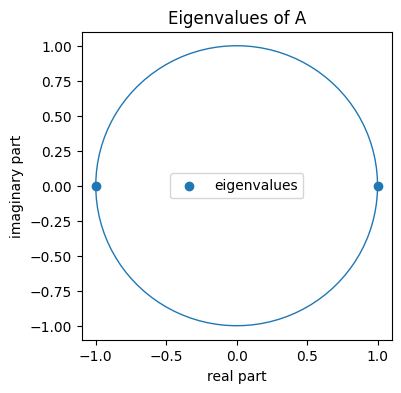

In [8]:
f = plt.figure(figsize=(4, 4))

t = np.linspace(0,np.pi*2,100)
plt.title('Eigenvalues of A')
plt.plot(np.cos(t), np.sin(t), linewidth=1)

plt.scatter(L.real, L.imag, label='eigenvalues')
plt.xlabel('real part')
plt.ylabel('imaginary part')
_=plt.legend()

So what's going on here? The first eigenvalue (1, 0) tells us that there are directions in which this system is growing (the x axis). The second eigenvalue (-1, 0) tells us that there is a direction in which our system is shrinking (the y axis of the flowfield). Obviously, a system cannot grow and shrink in the same directions, so these must be two different directions, meaning that in the middle there must be a place with zero change, an <b>unstable fixed point </b>.

### But what about the complex part?

We saw that the real part of the eigenvalues determined either an increase or decrease in the trajectories. But what does the imaginary component of the eigenvalues mean? In the next question we will ask you to find out.
In the next section we will give you all the freedom to explore the two eigenvalues of $A$ and values for $b$ in $\dot{x} = Ax + b$. Run the code below, and then try to answer the questions below.



In [9]:
_=interact(interactive_eigval_plot,
         real1=FloatSlider(min=-2.0, max=2.0, step=0.1, value=1.0, description='Real 1', continuous_update=continuous_update),
         real2=FloatSlider(min=-2.0, max=2.0, step=0.1, value=-1.0, description='Real 2', continuous_update=continuous_update),
         imag1=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='imag. 1', continuous_update=continuous_update),
         imag2=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='Imag. 2', continuous_update=continuous_update),
         b=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='b', continuous_update=continuous_update))

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Real 1', max=2.0, min=-2.0)…

---

> **Assignment 5**
>
> Try a number of different settings, what does the imaginary part of the eigenvalues of A do?
>
> <details>
> <summary>Solution</summary>
>
> Rotation! Positive imaginary parts are associated with counter-clockwise rotation, and the other way around.
> </details>


---

> **Assignment 6**
>
> What's the significance of a 0 eigenvalue?
> <details>
> <summary>Solution</summary>
>
> Stability. Directions that are asociated with  0 eigenvalues are stable.
> </details>

---

# 3.  Noise and fitting dynamics <a name="noise"></a>

In neuroscience, we often deal with activity from some neurons through time, without knowing the underlying dynamical system. This data might look something like this:


\begin{array}{c|ccccc}
   & \text{0ms} & \text{1ms} & \text{2ms} & \text{3ms} & \text{4ms} \\
  \hline
  \text{Neuron 1 firing rate} & 1 & 0.5 & 0.3 & 1 & 0.8 \\
  \text{Neuron 2 firing rate} & 0.3 & 0.6 & 0.5 & 0.9 & 1 \\
\end{array}

Given a dataset with measurements $x(t) \in X$ like this, we can infer the underlying dynamical system by fitting a linear system to the data. This is relatively straightforward using least squares optimization on the dynamics matrix:

$\underset{A}{\operatorname{argmin}}  \sum_{t} (Ax(t) - x(t+1))^2$. Or in words: we find the dynamics matrix $A$ that minimizes the squared error between the prediction of the next time step $Ax(t)$ and the actual next time step $x(t+1)$. If the data $X$ comes from a linear system, then this procedure is guaranteed to recover the underlying dynamical system <b>locally</b>. <b>However</b>, in the real world, data - and especially neural activity is extremely noisy, meaning that the underlying dynamical system will look more like $\dot{x} = Ax(t) + \eta, \eta \sim \psi(t)$. Where $\eta$ is noise sampled from some probability distribution $\psi$. If this noise is very strong, then fitting a dynamics matrix $A$ to the data can be very difficult. But that will not stop us from trying! In the next section we will give you some data and ask you to fit a dynamical system to simulated data.


<Axes: title={'center': 'Fitted linear system, noise level: 0.01'}, xlabel='x', ylabel='y'>

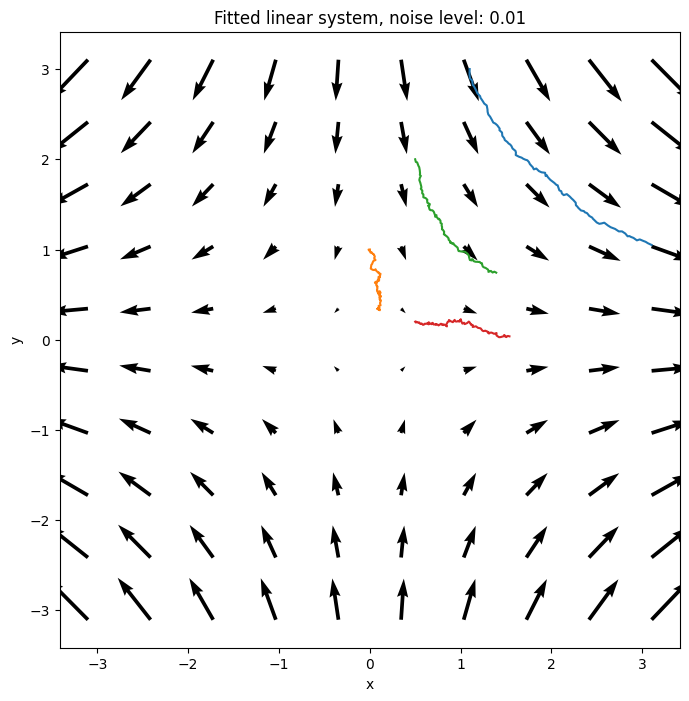

In [14]:
# change this noise level variable
NOISE_LEVEL = 0.01

# simulate an unstable system (Ax + noise)
noisy_data = simulate_noisy_system(noise_level=NOISE_LEVEL)

# fit a dynamics matrix to the noisy data
A_fitted = fit_dynamics_matrix_continuous(noisy_data, 0.1)

# Define the new fitted system of ODEs
def linear_system_fitted(X, t=0):
    return (X @ A_fitted)

# plot the fitted flowfield and the trajectories
plot_2d_flowfield(linear_system_fitted, data=noisy_data, title=f'Fitted linear system, noise level: {NOISE_LEVEL}')

---

> **Assignment 7**
>
> In the cell above, we are taking the unstable system from before, and simulating it with noise (see the four coloured trajectories). Then we are fitting a dynamics matrix (A_fitted) to these four trajectories. Note how well the fitted dynamics fit the true dynamics (see the flowfield). What happens when you increase the noise? Name two things that change when the noise increases. Try the same noise level multiple times.
>
> <details>
> <summary>Solution</summary>
>
> The fit becomes worse. The flowfield predicted by A_fitted does not match those of the unstable system ($A$) that we saw earlier. Second, the dynamics predicted by A_fitted become unreliabe: the fitted dynamics are different every time.
> </details>








---

> **Assignment 8**
>
> Can you thing of something that might solve the issues you found in question 1?
>
> <details>
> <summary>Solution</summary>
>
> Many possible answers, we could try to smooth out the noise, but simply collecting more data might be enough.
> </details>

---

# 4. High-dimensional dynamical systems and manifolds <a name="hd"></a>

So far we have only been looking at 2-dimensional systems. Bot ofcourse, in real life a neuroscientist will probably record from thousands of different neurons, making our datasets closer to something that looks like this


\begin{array}{c|ccccc}
   & \text{0ms} & \text{1ms} & \text{2ms} & \text{3ms} & \text{4ms} \\
  \hline
  \text{Neuron 1 firing rate} & 1 & 0.5 & 0.3 & 1 & 0.8 \\
  \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
  \text{Neuron 1020 firing rate} & 0.3 & 0.6 & 0.5 & 0.9 & 1 \\
\end{array}

Now, visualizing dynamical systems and their flowfields becomes much more complicated. Luckily neural activity often lives in <b>low-dimensional</b> manifolds in high dimensional space. Below you will see an image to illustrate what a low-dimensional manifold is.


![manifold](https://raw.githubusercontent.com/ManteLab/Iton_notebooks_public/refs/heads/main/images/gallego_manifold.png)



In this figure, we are looking at a 3-dimensional neural space, where every axis (N1, N2, N3) represents the activity of one neuron. But notice, that trajectories of neural activity do not actually occupy the full space. Instead the trajectories live on a 2-dimensional plane (spanned by U1 and U2) inside of the full 3D space. This plane is often called the manifold. This type of behaviour is very common in neural data, so when analyzing high-dimensional neural signals, part of the analysis is often to finding the manifold. It's important to note that a manifold does not have to be a (hyper) plane, it can be any high- or low dimensional shape.

### Finding the manifold: PCA

There are many different ways of finding low-dimensional manifolds in high dimensional spaces. In this exercise, we will only look at one simple example: Principle Component Analysis (PCA). We saw PCA before in the exercise session on neural population analyses, where we used it to quantify the "dimensionality" of different activity patterns. In the following example we will give you a dynamical system, and you will have to figure out how high dimensional this system is. Let's start by simulating a noisy three dimensional system.

Text(0.5, 0, 'neuron 3')

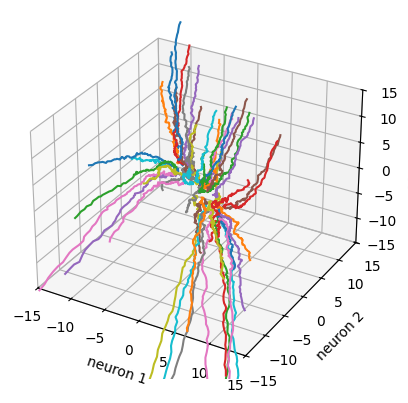

In [15]:
NOISE_LEVEL = 0.1

# simulate a 3d system
noisy_3d_data =  simulate_noisy_3d_system(NOISE_LEVEL)

# Create a figure
fig = plt.figure()

# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')
for i in range(50):
    ax.plot(noisy_3d_data[:, i, 0], noisy_3d_data[:, i, 1], noisy_3d_data[:, i, 2], label='3D Line')

ax.set_ylim(-15, 15)
ax.set_xlim(-15, 15)
ax.set_zlim(-15, 15)

ax.set_xlabel('neuron 1')
ax.set_ylabel('neuron 2')
ax.set_zlabel('neuron 3')

As you can tell, it's already difficult to tell what is going, even in 3 dimensions. So let's apply PCA, and see if we can find dimensions that explain variance.

(0.0, 1.0)

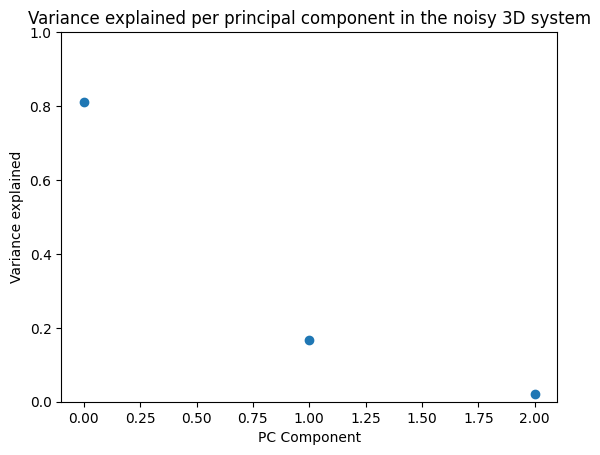

In [16]:
variance_explained, components = pca(noisy_3d_data)
plt.scatter(range(3), variance_explained)
plt.xlabel('PC Component')
plt.ylabel('Variance explained')
plt.title('Variance explained per principal component in the noisy 3D system')
plt.ylim([0, 1])

---

> **Assignment 9**
>
> How many principal components do you need to explain the noisy 3-dimensional data?
>
> <details>
> <summary>Solution</summary>
>
> The first two principal components seem to explain more than 95% of the variance of the data. So 2.
> </details>

---

> **Assignment 10**
>
> What does that tell you about the shape of the low-dimensional manifold?
>
> <details>
> <summary>Solution</summary>
>
> Two principal components span a 2d plane. Suggesting that the data lives in a 2d plane within 3d space.
> </details>

---

> **Assignment 11**
>
> The third component is close to zero, but is not zero, why is that?
>
> <details>
> <summary>Solution</summary>
>
> Because the data is noisy. Remember that the equation for a noisy system is $\dot{x} = Ax + \eta$. So while $A$ might be limiting movement in 2 dimensions, $\eta$ can still contribute noise in a third dimension.
> </details>

---

>**Assignment 12**
>
>  What do you expect to happen to the explained variance if we simulate this system at a higher noise levels? (you can try this by yourself)
> <details>
> <summary>Solution</summary>
>
> Because the noise is distributed equally across all dimensions, higher noise levels will cause the variance explained to be more evenly distributed. Meaning a higher variance explained for the last component, and a lower variance explained for the first one.
> </details>

---

Next, we can project the data onto the 2d plane that explains most of the variance.

Text(0.5, 1.0, '2d manifold')

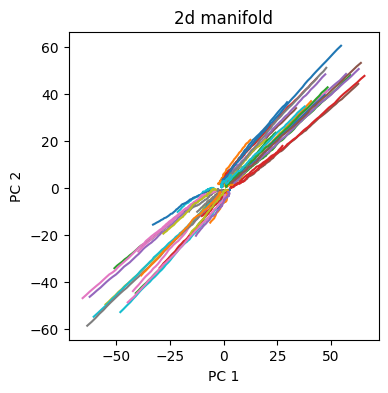

In [17]:
# project our 3d data onto the first two components
low_d_proj = noisy_3d_data @ components[:, :2]

f = plt.figure(figsize=(4, 4))
_=plt.plot(low_d_proj[..., 0], low_d_proj[..., 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2d manifold')

---

> **Assignment 13**
>
> We found the 2d manifold that captures most of the data. If we tell you that most initial conditions are far from the origin (0, 0, 0), can you tell what sort of system this probably is?
>
> <details>
> <summary>Solution</summary>
>
> This is an attracting system, all trajectories seem to move towards to origin.
> </details>







---

> **Assignment 14**
>
> How would you confirm that?
> <details>
> <summary>Solution</summary>
> We can fit a linear model to the 2d-projected data, that should give us 2 eigenvalues smaller than 0, showing that this is indeed an attracting system.
> </details>

---

# 5. Nonlinear dynamics and linearization <a name="nonlinear"></a>

So far we have been looking at very simple linear systems. And there is only so many things a linear system can do. In the real world, interactions between neurons are often highly non-linear. Below is an example of a nonlinear system that implements a so called "saddle point". Have a look at the system below. Try to find out why our previous notions about "attracting", "unstable"  behaviour do not really apply to this system.

<Axes: title={'center': '2-D flowfield of a saddle point system'}, xlabel='x', ylabel='y'>

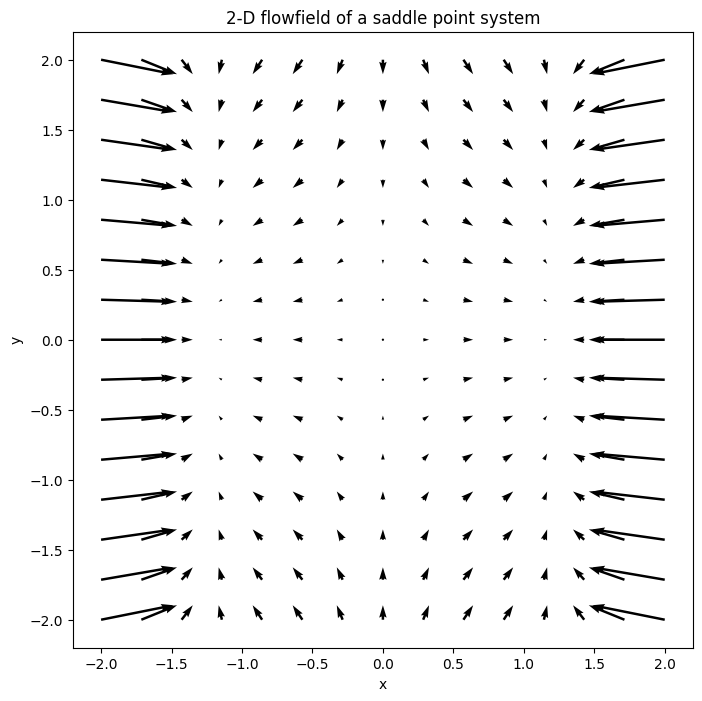

In [18]:

# Define the system of equations
def saddle_node_system(state):
    x, y = state
    dxdt = x - x**3
    dydt = -y
    return np.array([dxdt, dydt])


def nonlinear_system(X, t=0):
    return X + saddle_node_system(X) * 2


plot_2d_flowfield(nonlinear_system, space=np.linspace(-2, 2, 15),title='2-D flowfield of a saddle point system')

### Fixed points and slow points

So where do we start to analyze a complicated system like this? We can answer this by ruling out parts of the system that are hard to analyze. Notice that at the edges, the system moves very fast. Fast moving dynamics are hard to analyze because the system often spends very little time in regions with fast moving dynamics. Inversely, <b>slow points</b> and <b>fixed points</b> are locations where the dynamics move very slowly and not at all. We will see later why this is important. For now, try to see if you can visually find the fixed points in the plot above, there are 3. In the next cell we will do this algorithmically. Finding fixed points algorithmically is quite straightforward, given that $\dot{x} = \mathbf{0}$, we can start with a bunch of guesses $\hat{x}$, and then optimize these initial guesses to find fixed points: $\underset{\hat{x}}{\operatorname{argmin}}  (\hat{x} - f(\hat{x}))^2$, where $f$ is our dynamical system. We will apply this in the next cell.

In [19]:
# General function to compute fixed points
def find_fixed_points(system, initial_guess):
    """
    Find fixed points for a given 2D system using a numerical solver.

    Parameters:
    - system: a function that returns the derivatives [dx/dt, dy/dt] as a numpy array.
    - initial_guess: a numpy array with the initial guess for the fixed point.

    Returns:
    - fixed_point: a numpy array with the coordinates of the fixed point.
    """
    # Define the function for which we want to find the roots (i.e., f(x, y) = 0 and g(x, y) = 0)
    def func(state):
        return system(state)

    # Use fsolve to find the roots
    fixed_point = fsolve(func, initial_guess)

    return fixed_point

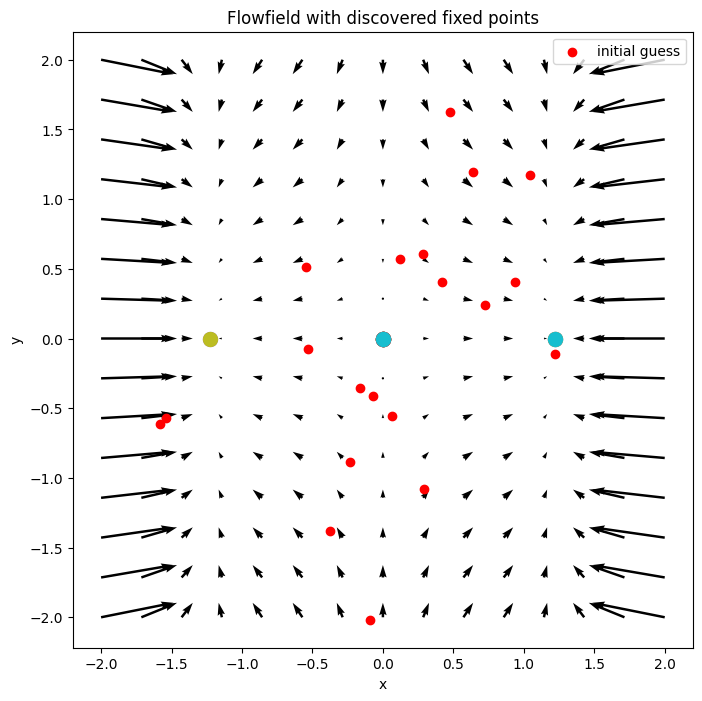

In [20]:
# plot flowfield
ax = plot_2d_flowfield(nonlinear_system, space=np.linspace(-2, 2, 15),title='Flowfield with discovered fixed points')

# make 10 initial random guesses
guesses = np.random.randn(20, 2) * 0.75

# for each guess, find where (f(x) = x)
fixed_points = []
for i, guess in enumerate(guesses):
    fixed_point = find_fixed_points(nonlinear_system, guess)
    fixed_points.append(fixed_point)
    ax.scatter(*fixed_point, s=100)

# plot initial guesses
ax.scatter(*guesses.T, color='red', label='initial guess')
plt.legend()

# save the unique fixed points
unique_fixed_points = np.unique(np.array(fixed_points).round(decimals=2), axis=0)

### Local linearization

In the plot above you can see that we made a bunch of random guesses (in red) about the fixed points and then found the 3 fixed points (coloured circles) by minizing $(f (\hat{x}) - \hat{x})^2$. Now we can study the dynamical system in parts. Because the dynamics around fixed points move very slowly, these dynamics are (close to) linear dynamics, meaning that close to fixed points, we can find some matrix $J$ (called the jacobian), such that $\dot{x} \approx Jx_{\text{fixed}}$. This turns $f$ back into a linear system $locally$ around fixed points, meaning that we can now apply our ideas of "attraction" and "instability" again. This is what we'll do in the next cells.

In [21]:
for point in unique_fixed_points:
    print("Found fixed point:", point)

Found fixed point: [-1.22  0.  ]
Found fixed point: [0. 0.]
Found fixed point: [ 1.22 -0.  ]


In the next cell, fill in the fixed points, and have a look at the eigenvalues of their respective jacobians.

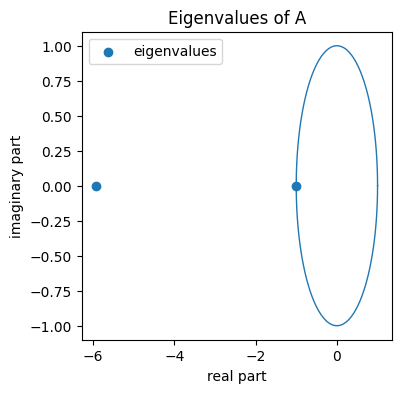

In [24]:
# FILL IN THIS POINT
FIXED_POINT = [-1.22, 0]



jacobian = compute_jacobian(nonlinear_system, np.array(FIXED_POINT))

L, _ = np.linalg.eig(jacobian)

f = plt.figure(figsize=(4, 4))

t = np.linspace(0,np.pi*2,100)
plt.title('Eigenvalues of A')
plt.plot(np.cos(t), np.sin(t), linewidth=1)

plt.scatter(L.real, L.imag, label='eigenvalues')
plt.xlabel('real part')
plt.ylabel('imaginary part')
plt.legend()


---

> **Assignment 15**
>  Above you computed the fixed points for a nonlinear system. We found 3 unique fixed points. But the linear dynamics around these fixed points are not all the same. One fixed point has different local dynamics than the other two. Which one?
>
> <details>
> <summary>Solution</summary>
> The fixed point at (0,0) is unique.
> </details>




---

> **Assignment 16**
>  Based on the eigenvalues of the fixed point you found in the previous assignment, what sort of dynamics exist around the origin (0,0)?
>
> <details>
> <summary>Solution</summary>
> These are unstable dynamics, that will "flow" either left or right. You can tell by the two opposite eigenvalues (one positive and one negative)
> </details>


---

> **Assignment 17**
>  What about the other two fixed points? What sort of dynamics exist around those two? How can you tell by the eigenvalues?
>
> <details>
> <summary>Solution</summary>
> The other two fixed points ((-1.22, 0) and (1.22, 0)) are surrounded by stable "attracting" dynamics, which you can see by the fact that both eigenvalues are smaller than 0.
> </details>






---



> **Bonus Assignment (discussed more next lecture)**
>
> So far we saw how to a linear dynamical system to data. We also saw that this does not always work. This is especially true if your data comes from a highly nonlinear system. Can you think of a model that can fit data from a non linear, high dimensional dynamical system.
>
> <details>
> <Summary>
> Answers
> </Summary>
>
> Artificial neural networks can be used to do this. Recurrent neural networks (RNNs) are actually a type of nonlinear dynamical system.
>
> </details>




---

# End of this exercise session